In [ ]:
## Continuation of the previous problem named as ConfusionMatrix_ROCcurve_logistic_regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("/home/ashish/projects/ROC_Curve_AND_Optimal_Threshold/Simmons2-Copy1.xls")
data

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


In [5]:
data.describe()  ## t describe the statistical information about data

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [6]:
data['Coupon'].unique()

array([0, 1])

In [7]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [8]:
60/100      ## using the baseline for the threshold

0.6

## Building the model

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
## splitting the dataset into training and testing dataset
x = data[['Card','Spending']]  ## independent variables
y = data['Coupon'].values.reshape(-1,1)  ## dependent variable - 100 rows and 1 column
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
len(x_train),len(y_train),len(x_test),len(y_test)

(75, 75, 25, 25)

In [22]:
## this below method is used to chek the available methods and parameters 
##LogisticRegression?

In [24]:
Logisticreg = LogisticRegression(solver='lbfgs')
Logisticreg.fit(x_train,y_train.ravel())  ## ravel will return 1D array with all the input array elements

LogisticRegression()

## Predict the values of dependent variable using test and training set of independent variable

In [25]:
y_predict_test = Logisticreg.predict(x_test)
y_predict_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [26]:
y_predict_train = Logisticreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0])

In [43]:
## Calculating the probabilities
y_prob_train = Logisticreg.predict_proba(x_train)[:,1]
##print(y_prob_train)
y_prob_train.reshape(1,-1)   ## 75 rows and 1 column

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

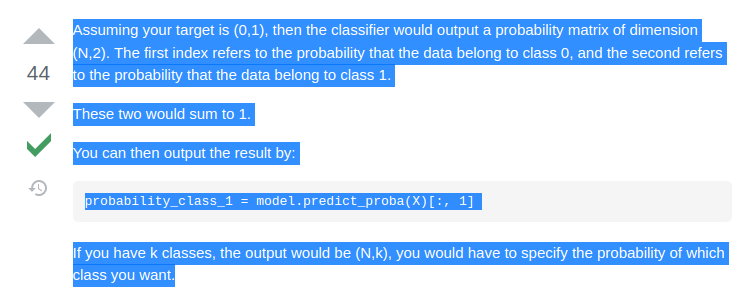

In [44]:
y_prob_test = Logisticreg.predict_proba(x_test)[:,1]
##print(y_prob_test)
y_prob_test.reshape(1,-1)

array([[0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
        0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
        0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
        0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
        0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435]])

In [47]:
x = data[['Spending','Card']]
y = data['Coupon']

import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y,x1).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.1012
Time:                        23:01:49   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
Card           1.0987      0.445      2.471      0.013       0.227       1.970
==============================================================================
"""

## Logistic Regression Equation coefficients::
    spending --> 0.3416
    Card --> 1.0987
    const = -2.1464

# ACCURACY SCORE

In [53]:
## Checking the Accuracy of our model

from sklearn.metrics import accuracy_score
score =  accuracy_score(y_test,y_predict_test)
score

0.76

# CONFUSION MATRIX

In [54]:
## Checking the confusion matrix of our model

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict_test)

array([[15,  1],
       [ 5,  4]])

In [62]:
tn,fp,fn,tp = confusion_matrix(y_test,y_predict_test).ravel()
print("True Negatives :: ",tn)
print("False Positives :: ",fp)
print("True Positives :: ",tp)
print("False Negatives :: ",fn)

True Negatives ::  15
False Positives ::  1
True Positives ::  4
False Negatives ::  5


# CLASSIFICATION REPORT

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [64]:
Accuracy = (tp+tn)/(tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.76


In [65]:
Specificity = tn/(tn+fp)
print("Specificty {:0.2f}".format(Specificity))

Specificty 0.94


In [67]:
Sensitivity = tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.44


# ROC CURVE

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

log_ROC_AUC1 = roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,threshold1 = roc_curve(y_train,y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

In [75]:
print(threshold1,"\n\n\n")
print(fpr1,"\n\n\n\n")
print(tpr1)

[1.67464141 0.67464141 0.6571001  0.65309742 0.528514   0.50977653
 0.49970327 0.4965167  0.49622117 0.48809323 0.44068025 0.43807264
 0.41992276 0.41629601 0.40406607 0.40217015 0.38633222 0.37282384
 0.36155602 0.33638478 0.33320924 0.33191449 0.32890329 0.32880793
 0.31373499 0.29274386 0.28877877 0.28563859 0.28466974 0.28195004
 0.27457435 0.25844531 0.25782472 0.23431177] 



[0.         0.         0.         0.02272727 0.02272727 0.09090909
 0.11363636 0.11363636 0.13636364 0.13636364 0.34090909 0.36363636
 0.43181818 0.43181818 0.47727273 0.47727273 0.56818182 0.56818182
 0.61363636 0.61363636 0.63636364 0.65909091 0.65909091 0.70454545
 0.72727273 0.72727273 0.77272727 0.77272727 0.79545455 0.81818182
 0.81818182 0.90909091 0.90909091 1.        ] 




[0.         0.03225806 0.09677419 0.09677419 0.32258065 0.32258065
 0.35483871 0.38709677 0.38709677 0.48387097 0.48387097 0.51612903
 0.51612903 0.58064516 0.58064516 0.61290323 0.61290323 0.67741935
 0.67741935 0.70967742 0.741

In [71]:
print(log_ROC_AUC1)

0.6158357771260996


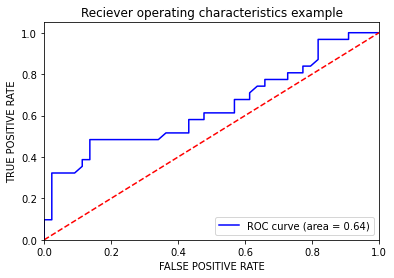

In [77]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label='ROC curve (area = %0.2f)'%roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("Reciever operating characteristics example")
plt.legend(loc="lower right")
plt.show()

In [76]:
log_ROC_AUC = roc_auc_score(y_test,y_predict_test)
fpr,tpr,threshold = roc_curve(y_test,y_prob_test)
roc_auc = auc(fpr,tpr)

In [79]:
print(fpr,"\n\n\n\n")
print(tpr)

[0.     0.     0.     0.0625 0.0625 0.125  0.125  0.125  0.375  0.375
 0.625  0.75   1.    ] 




[0.         0.11111111 0.33333333 0.33333333 0.55555556 0.55555556
 0.66666667 0.88888889 0.88888889 1.         1.         1.
 1.        ]


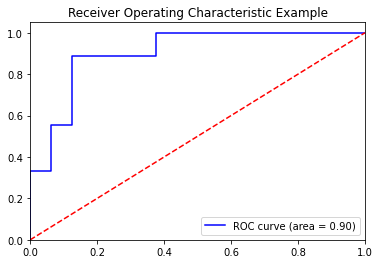

In [82]:
plt.figure()
plt.plot(fpr,tpr,color="blue",label="ROC curve (area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.title("Receiver Operating Characteristic Example")
plt.legend(loc="lower right")

# first case: set threshold =0.35 

In [94]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob_test.reshape(1,-1),threshold=0.35)[0]
y_predict_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [95]:
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [96]:
confusion_matrix_2 = confusion_matrix(y_test,y_predict_class1)
confusion_matrix_2

array([[8, 8],
       [0, 9]])

In [97]:
tn,fp,fn,tp = confusion_matrix(y_test,y_predict_class1).ravel()
print("True negative : ",tn)
print("False positive : ",fp)
print("False negative : ",fn)
print("True Positive : ",tp)

True negative :  8
False positive :  8
False negative :  0
True Positive :  9


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



# Second Case: set threshold = 0.50

In [99]:
from sklearn.preprocessing import binarize
y_predict_class2 = binarize(y_prob_test.reshape(1,-1),threshold=0.50)[0]
y_predict_class2

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

In [100]:
y_predict_class2 = y_predict_class2.astype(int)
y_predict_class2

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0])

In [101]:
confusion_matrix_3 = confusion_matrix(y_test,y_predict_class2)
print(confusion_matrix_3)

[[15  1]
 [ 5  4]]


In [102]:
tn,fp,fn,tp = confusion_matrix(y_test,y_predict_class2).ravel()
print("True negative : ",tn)
print("False positive : ",fp)
print("False negative : ",fn)
print("True Positive : ",tp)

True negative :  15
False positive :  1
False negative :  5
True Positive :  4


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



# Third Case : --> Set threshold = 0.70

In [105]:
from sklearn.preprocessing import binarize
y_predict_class3 = binarize(y_prob_test.reshape(1,-1),threshold=0.70)[0]
y_predict_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
y_predict_class3 = y_predict_class3.astype(int)
y_predict_class3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [109]:
confusion_matrix_4 = confusion_matrix(y_test,y_predict_class3) 
print(confusion_matrix_4)

[[16  0]
 [ 9  0]]


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



/home/ashish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashish/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# FINAL STEP : --> FINDING OPTIMAL CUTOFF POINT OR THRESHOLD VALUE

In [111]:
from sklearn.metrics import roc_curve,auc

In [113]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob_test) 
roc_auc = auc(fpr,tpr)

In [114]:
print("Area under the ROC curve : %f "%roc_auc)

Area under the ROC curve : 0.902778 


In [119]:
import numpy as np
i = np.arange(len(tpr))  ## index for df
roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i),
                   'tpr':pd.Series(tpr,index=i),
                   '1-fpr': pd.Series(1-fpr,index=i),
                    'tf' : pd.Series(tpr-(1-fpr),index=i),
                    'thresholds' : pd.Series(thresholds,index=i)
                   })
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


[Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, ''),
 Text(12.0, 0, ''),
 Text(14.0, 0, '')]

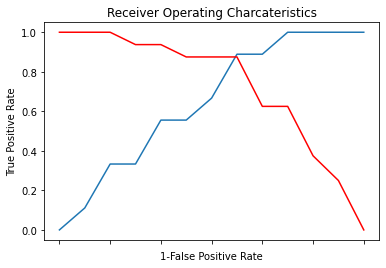

In [120]:
fig,ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charcateristics')
ax.set_xticklabels([])

In [122]:
from sklearn.preprocessing import binarize
y_predicted_class4 = binarize(y_prob_test.reshape(1,-1),threshold=0.45)[0]
y_predicted_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [124]:
y_predicted_class4 = y_predicted_class4.astype(int)
y_predicted_class4

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0])

In [126]:
confusion_matrix_5 = confusion_matrix(y_test,y_predicted_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



# hence , at last we obtained the most optimum threshold for our logistic model.